# Active Contour Model (Snake) Integer

In [1]:
import sys
import os

# mengambil path dari project root (menghindari ModuleNotFoundError)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

## Set default parameters & load image

(np.float64(-0.5), np.float64(511.5), np.float64(282.5), np.float64(-0.5))

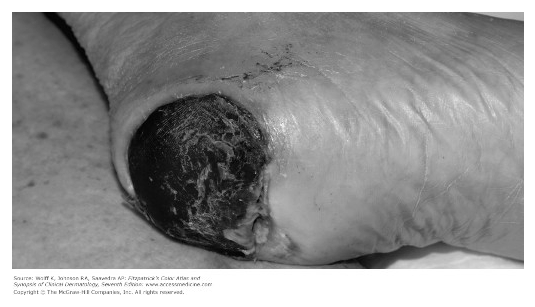

In [2]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

my_dpi = 120 # https://www.infobyip.com/detectmonitordpi.php

cr, cc, rad = 160, 190, 115
sigma, sample = 3.5, 100
alpha, beta, gamma = 1, 10, 1
max_iter = 100


img_path, img_name, img_extension = "../data/luka_hitam/images", "5", "jpg"
path = f"{img_path}/{img_name}.{img_extension}"

img = imread(path)
imgray = rgb2gray(img)

img_fig = plt.figure(frameon=False, figsize=(img.shape[1]/my_dpi, img.shape[0]/my_dpi), dpi=my_dpi)
img_ax = img_fig.add_axes([0, 0, 1, 1])
img_ax.imshow(imgray, cmap=plt.cm.gray)
img_ax.set_xticks([]), img_ax.set_yticks([]) # hide axes
img_ax.axis('off')

## Snake Initialization (Circle)

(np.float64(-0.5), np.float64(511.5), np.float64(282.5), np.float64(-0.5))

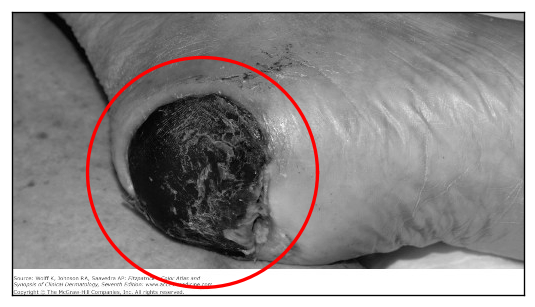

In [3]:
import numpy as np

theta = np.linspace(0, 2*np.pi, sample)
r = cr + rad*np.sin(theta)
c = cc + rad*np.cos(theta)
snake_init = np.array([r, c]).T
snake_xy = snake_init[:, ::-1]
x = snake_xy[:, 0]
y = snake_xy[:, 1]
snake_len = len(x)

snake_init_fig= plt.figure(frameon=False, figsize=(img.shape[1]/my_dpi, img.shape[0]/my_dpi), dpi=my_dpi)
snake_init_ax = snake_init_fig.add_axes([0, 0, 1, 1])
snake_init_ax.imshow(imgray, cmap=plt.cm.gray)
snake_init_ax.plot(snake_xy[:, 0], snake_xy[:, 1], '-r', lw=2)
snake_init_ax.set_xticks([]), snake_init_ax.set_yticks([])
img_ax.axis('off')

## Energy external

(np.float64(-0.5), np.float64(511.5), np.float64(282.5), np.float64(-0.5))

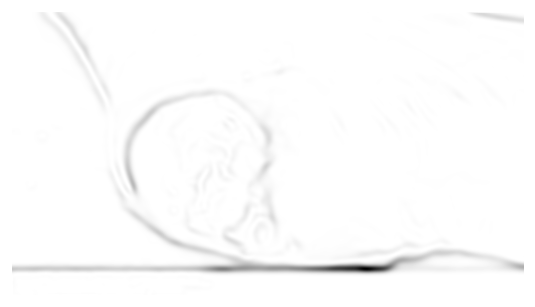

In [8]:
from skimage.filters import gaussian, sobel

ext = gaussian(imgray, sigma)
ext = sobel(ext)
ext = -ext**2

ext_fig= plt.figure(frameon=False, figsize=(img.shape[1]/my_dpi, img.shape[0]/my_dpi), dpi=my_dpi)
ext_ax = ext_fig.add_axes([0, 0, 1, 1])
ext_ax.imshow(ext, cmap=plt.cm.gray)
ext_ax.set_xticks([]), ext_ax.set_yticks([])
ext_ax.axis('off')

## Energy internal (matrix)

In [ ]:
a = beta
b = -(4*beta + alpha)
c = 6*beta + 2*alpha

eye_n = np.eye(snake_len, dtype=float)

c_axis = c * eye_n
b_axis = b * ( np.roll(eye_n, -1, axis=0) + np.roll(eye_n, -1, axis=1) )
a_axis = a * ( np.roll(eye_n, -2, axis=0) + np.roll(eye_n, -2, axis=1) )

A = c_axis + b_axis + a_axis
inv = np.linalg.inv(eye_n + gamma * A) # acton, ivins matrix equation

inv

array([[0.19146702, 0.16380883, 0.1184951 , ..., 0.07504022, 0.1184951 ,
        0.16380883],
       [0.16380883, 0.19146702, 0.16380883, ..., 0.04129495, 0.07504022,
        0.1184951 ],
       [0.1184951 , 0.16380883, 0.19146702, ..., 0.018577  , 0.04129495,
        0.07504022],
       ...,
       [0.07504022, 0.04129495, 0.018577  , ..., 0.19146702, 0.16380883,
        0.1184951 ],
       [0.1184951 , 0.07504022, 0.04129495, ..., 0.16380883, 0.19146702,
        0.16380883],
       [0.16380883, 0.1184951 , 0.07504022, ..., 0.1184951 , 0.16380883,
        0.19146702]], shape=(100, 100))

## Deform Snake

(np.float64(-0.5), np.float64(511.5), np.float64(282.5), np.float64(-0.5))

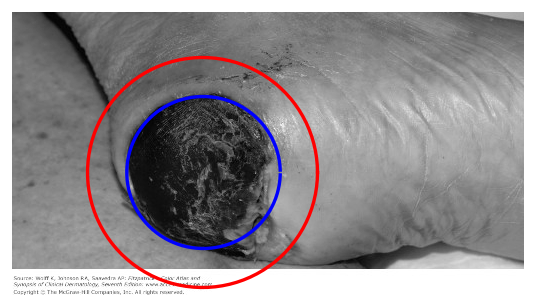

In [13]:
gy, gx = np.gradient(ext)

xt = np.copy(x)
yt = np.copy(y)

for i in range(max_iter):
        fx = np.array([])
        fy = np.array([])
        
        for i in range(snake_len):
                fx = np.append(fx, gx[np.round(yt[i]).astype(int)] [np.round(xt[i]).astype(int)] )
                fy = np.append(fy, gy[np.round(yt[i]).astype(int)] [np.round(xt[i]).astype(int)] )
        
        xn = np.dot(inv, xt + gamma * fx) # acton, ivins equation
        yn = np.dot(inv, yt + gamma * fy)

        xt = xn
        yt = yn

snake_final = np.array([xt, yt]).T


snake_final_fig= plt.figure(frameon=False, figsize=(img.shape[1]/my_dpi, img.shape[0]/my_dpi), dpi=my_dpi)
snake_final_ax = snake_final_fig.add_axes([0, 0, 1, 1])
snake_final_ax.imshow(imgray, cmap=plt.cm.gray)
snake_final_ax.plot(snake_xy[:, 0], snake_xy[:, 1], '-r', lw=2)
snake_final_ax.plot(snake_final[:, 0], snake_final[:, 1], '-b', lw=2)
snake_final_ax.set_xticks([]), snake_final_ax.set_yticks([])
snake_final_ax.axis('off')
